In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, I upload the first database. In this database we can see a series of countries and a series of values, such as the cost of living, the cost of a coworking, etc.. so that the person according to their criteria can assess the country that best suits him/her. 

In [56]:
data = pd.read_csv('../Data/raw/nomad_cities.csv', sep='\t')

#https://www.kaggle.com/datasets/danielhain/digital-nomads

In [57]:
data.head()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,...,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.73,1.73,152.41,1273,1364,1.0,52.7,0.4,0.6,...,1.0,1.00,1.00,0.8,Budapest,1.0,28.17,0.40,0.60,0
1,1,0.85,0.85,98.88,780,777,0.8,78.8,0.6,0.2,...,0.4,0.95,0.95,0.4,Chiang Mai,0.8,44.53,0.40,0.80,0
2,2,1.99,1.99,159.13,1653,1639,1.0,40.8,0.6,0.8,...,1.0,0.94,0.94,0.8,Prague,1.0,16.66,0.42,0.80,1
3,3,1.88,1.88,47.01,1640,1545,1.0,DotMap(__next__=DotMap()),1.0,0.6,...,0.6,0.94,0.94,DotMap(__next__=DotMap()),Taipei,1.0,24.37,0.00,1.00,0
4,4,5.00,5.00,200.00,3309,3028,0.8,34,0.6,0.6,...,1.0,0.94,0.94,0.8,Austin,1.0,22.49,0.80,0.73,0


In [58]:
data.columns

Index(['Unnamed: 0', 'coffee_in_cafe', 'cost_beer', 'cost_coworking',
       'cost_expat', 'cost_nomad', 'female_friendly', 'fragile_states_index',
       'free_wifi_available', 'freedom_score', 'friendly_to_foreigners',
       'internet_speed', 'latitude', 'leisure', 'lgbt_friendly', 'life_score',
       'longitude', 'nightlife', 'nomadScore', 'nomad_score', 'peace_score',
       'place', 'places_to_work', 'press_freedom_index', 'racism', 'safety',
       'weed'],
      dtype='object')

I'm going to drop the columns that I don't think that are important or that don't give me the info I need

In [59]:
data = data.drop(['Unnamed: 0', 'cost_expat', 'leisure', 'lgbt_friendly', 'nomadScore', 'press_freedom_index', 'weed', 'peace_score'], axis=1)
data.head()

,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,place,places_to_work,racism,safety
0,1.73,1.73,152.41,1364,1.0,52.7,0.4,0.6,0.6,31,47.497912,0.86,19.040235,1.0,1.00,Budapest,1.0,0.40,0.60
1,0.85,0.85,98.88,777,0.8,78.8,0.6,0.2,0.6,14,18.787747,0.75,98.993128,0.4,0.95,Chiang Mai,0.8,0.40,0.80
2,1.99,1.99,159.13,1639,1.0,40.8,0.6,0.8,0.8,15,50.075538,0.83,14.437800,1.0,0.94,Prague,1.0,0.42,0.80
3,1.88,1.88,47.01,1545,1.0,DotMap(__next__=DotMap()),1.0,0.6,0.8,16,25.091075,0.93,121.559834,0.6,0.94,Taipei,1.0,0.00,1.00
4,5.00,5.00,200.00,3028,0.8,34,0.6,0.6,0.8,118,30.267153,0.95,-97.743061,1.0,0.94,Austin,1.0,0.80,0.73


Check for nan values

In [60]:
data.isna().sum()

coffee_in_cafe            0
cost_beer                 0
cost_coworking            0
cost_nomad                0
female_friendly           0
fragile_states_index      0
free_wifi_available       0
freedom_score             0
friendly_to_foreigners    0
internet_speed            0
latitude                  0
life_score                0
longitude                 0
nightlife                 0
nomad_score               0
place                     0
places_to_work            0
racism                    0
safety                    0
dtype: int64

and check the data type to know if I need the change the type, and which one could be the cause for not been the correct type, for example, values that don't proceed

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coffee_in_cafe          781 non-null    float64
 1   cost_beer               781 non-null    float64
 2   cost_coworking          781 non-null    float64
 3   cost_nomad              781 non-null    int64  
 4   female_friendly         781 non-null    float64
 5   fragile_states_index    781 non-null    object 
 6   free_wifi_available     781 non-null    float64
 7   freedom_score           781 non-null    object 
 8   friendly_to_foreigners  781 non-null    float64
 9   internet_speed          781 non-null    int64  
 10  latitude                781 non-null    float64
 11  life_score              781 non-null    float64
 12  longitude               781 non-null    float64
 13  nightlife               781 non-null    float64
 14  nomad_score             781 non-null    fl

In [62]:
data['fragile_states_index'].unique()

array(['52.7', '78.8', '40.8', 'DotMap(__next__=DotMap())', '34', '39.8',
       '29.2', '29', '21.3', '22.6', '74.9', '48.4', '23.8', '28.6',
       '70.7', 'DotMap()', '22.5', '36.1', '28.2', '21.8', '39.6', '65.3',
       '34.5', '43.1', '27.5', '32.4', '55.9', '53.2', '35.1', '52.9',
       '21.2', '70.4', '32.9', '40.7', '47.4', '43.4', '36.2', '75.5',
       '67', '73.9', '81', '79.6', '41.9', '72', '21.5', '69.6', '44.9',
       '77.3', '18.8', '64', '45.1', '52.4', '33.9', '53.7', '78.9', '78',
       '42.4', '66.1', '70.8', '65', '44.5', '51.6', '75.6', '74.2',
       '66.3', '80.2', '62', '24.1', '72.6', '87.7', '55.2', '83.6',
       '84.7', '43.2', '61.2', '63.4', '22.8', '72.2', '76.3', '66', '74',
       '73.2', '69.9', '90.7', '66.5', '87.4', '98.3', '89.6', '78.5',
       '101.7', '79', '72.5', '90.2', '56.6', '83.2', '96.3', '84.4',
       '103.5', '74.6', '71.1', '95.2', '91.2', '78.3', '91.3', '83.5',
       '87.8', '84.2', '81.8', '97.7', '71.2', '79.8', '83.8', '97

In [63]:
data['fragile_states_index'] = data['fragile_states_index'].replace('DotMap(__next__=DotMap())', '')

In [64]:
data['freedom_score'].unique()

array(['0.6', '0.2', '0.8', '1', '0.4', 'DotMap()'], dtype=object)

In [65]:
data['freedom_score'] = data['freedom_score'].replace('DotMap()', '')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coffee_in_cafe          781 non-null    float64
 1   cost_beer               781 non-null    float64
 2   cost_coworking          781 non-null    float64
 3   cost_nomad              781 non-null    int64  
 4   female_friendly         781 non-null    float64
 5   fragile_states_index    781 non-null    object 
 6   free_wifi_available     781 non-null    float64
 7   freedom_score           781 non-null    object 
 8   friendly_to_foreigners  781 non-null    float64
 9   internet_speed          781 non-null    int64  
 10  latitude                781 non-null    float64
 11  life_score              781 non-null    float64
 12  longitude               781 non-null    float64
 13  nightlife               781 non-null    float64
 14  nomad_score             781 non-null    fl

change the type to the correct one

In [67]:
data['fragile_states_index'] = pd.to_numeric(data['fragile_states_index'], errors='coerce')
data['freedom_score'] = pd.to_numeric(data['freedom_score'], errors='coerce')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coffee_in_cafe          781 non-null    float64
 1   cost_beer               781 non-null    float64
 2   cost_coworking          781 non-null    float64
 3   cost_nomad              781 non-null    int64  
 4   female_friendly         781 non-null    float64
 5   fragile_states_index    756 non-null    float64
 6   free_wifi_available     781 non-null    float64
 7   freedom_score           769 non-null    float64
 8   friendly_to_foreigners  781 non-null    float64
 9   internet_speed          781 non-null    int64  
 10  latitude                781 non-null    float64
 11  life_score              781 non-null    float64
 12  longitude               781 non-null    float64
 13  nightlife               781 non-null    float64
 14  nomad_score             781 non-null    fl

In [69]:
avg_cols = ['female_friendly', 'friendly_to_foreigners', 'life_score', 'racism', 'safety']
avg = data[avg_cols].mean(axis=1)
avg_index = avg*100


In [70]:
data['fragile_states_index'] = data['fragile_states_index'].fillna(avg_index)

In [71]:
data['freedom_score'] = data['freedom_score'].fillna(avg)

In [72]:
data.isna().sum()

coffee_in_cafe            0
cost_beer                 0
cost_coworking            0
cost_nomad                0
female_friendly           0
fragile_states_index      0
free_wifi_available       0
freedom_score             0
friendly_to_foreigners    0
internet_speed            0
latitude                  0
life_score                0
longitude                 0
nightlife                 0
nomad_score               0
place                     0
places_to_work            0
racism                    0
safety                    0
dtype: int64

In [73]:
data = data.to_csv('../Data/cleaned/nomad_cities.csv', index=False)

Upload the second database

In [74]:
data2 = pd.read_excel('../Data/raw/ms-excel-file-2.xls', engine=None)
data2

,ID,Dive Shop,Municipality,Location,coral species,Observation,LATD,LATM,LATS,LATITUDE,LOND,LONM,LOMS,LONGITUDE
0,1,Blue Dolphin,Carolina,Pinones,Acropora palmata,healthy,18.0,27.0,41.61,18.461558,65.0,58.0,58.02,-65.982783
1,2,Blue Dolphin,Guánica,Pta Brea,Acropora palmata,bleaching,17.0,56.0,5.40,17.928374,67.0,1.0,7.80,-66.918253
2,3,Blue Dolphin,Fajardo,Palominitos,Acropora cervicornis,healthy,18.0,20.0,8.52,18.337864,65.0,33.0,56.63,-65.563864
3,4,Blue Dolphin,Fajardo,Cayo Icacos,Acropora cervicornis,NaN,NaN,NaN,NaN,18.391523,NaN,NaN,NaN,-65.596532
4,5,Blue Dolphin,Aguadilla,El Natural,Montastraea annularis,healthy,18.0,27.0,48.49,18.463469,67.0,10.0,8.44,-67.169011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1328,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Joes Jam,Dichocoenia stokesii,NaN,NaN,NaN,NaN,18.297153,NaN,NaN,NaN,-64.847496
1328,1329,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Stragglers,Dichocoenia stokesii,NaN,NaN,NaN,NaN,18.303200,NaN,NaN,NaN,-64.836750
1329,1330,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Cow and Calf,Dichocoenia stokesii,NaN,NaN,NaN,NaN,18.303867,NaN,NaN,NaN,-64.848200
1330,1331,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Ledges (Little St. James),Dichocoenia stokesii,NaN,NaN,NaN,NaN,18.298083,NaN,NaN,NaN,-64.829700


Drop the columns you don't want to have in your database 

In [75]:
data2 = data2.drop(['ID', 'LATD', 'LATM', 'LATS', 'LOND', 'LONM', 'LOMS'], axis=1)
data2.head()

,Dive Shop,Municipality,Location,coral species,Observation,LATITUDE,LONGITUDE
0,Blue Dolphin,Carolina,Pinones,Acropora palmata,healthy,18.461558,-65.982783
1,Blue Dolphin,Guánica,Pta Brea,Acropora palmata,bleaching,17.928374,-66.918253
2,Blue Dolphin,Fajardo,Palominitos,Acropora cervicornis,healthy,18.337864,-65.563864
3,Blue Dolphin,Fajardo,Cayo Icacos,Acropora cervicornis,NaN,18.391523,-65.596532
4,Blue Dolphin,Aguadilla,El Natural,Montastraea annularis,healthy,18.463469,-67.169011


Check for the data types

In [76]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dive Shop      1332 non-null   object 
 1   Municipality   1332 non-null   object 
 2   Location       1330 non-null   object 
 3   coral species  1332 non-null   object 
 4   Observation    1001 non-null   object 
 5   LATITUDE       1332 non-null   float64
 6   LONGITUDE      1332 non-null   float64
dtypes: float64(2), object(5)
memory usage: 73.0+ KB


and check for nan and delate and replace them. As this columns are not very important for the scope of the project, I'm going to replace them by unknown

In [77]:
data2.isna().sum()

Dive Shop          0
Municipality       0
Location           2
coral species      0
Observation      331
LATITUDE           0
LONGITUDE          0
dtype: int64

In [78]:
data2['Observation'] = data2['Observation'].fillna('')

In [79]:
data2['Observation'] = data2['Observation'].replace('', 'unknown')

In [80]:
data2.dropna(subset=['Location'], inplace=True)

In [81]:
data2.isna().sum()

Dive Shop        0
Municipality     0
Location         0
coral species    0
Observation      0
LATITUDE         0
LONGITUDE        0
dtype: int64

normalize the columns names

In [82]:
data2.columns = data2.columns.str.lower().str.replace(' ', '_')

In [83]:
data2

,dive_shop,municipality,location,coral_species,observation,latitude,longitude
0,Blue Dolphin,Carolina,Pinones,Acropora palmata,healthy,18.461558,-65.982783
1,Blue Dolphin,Guánica,Pta Brea,Acropora palmata,bleaching,17.928374,-66.918253
2,Blue Dolphin,Fajardo,Palominitos,Acropora cervicornis,healthy,18.337864,-65.563864
3,Blue Dolphin,Fajardo,Cayo Icacos,Acropora cervicornis,unknown,18.391523,-65.596532
4,Blue Dolphin,Aguadilla,El Natural,Montastraea annularis,healthy,18.463469,-67.169011
...,...,...,...,...,...,...,...
1327,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Joes Jam,Dichocoenia stokesii,unknown,18.297153,-64.847496
1328,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Stragglers,Dichocoenia stokesii,unknown,18.303200,-64.836750
1329,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Cow and Calf,Dichocoenia stokesii,unknown,18.303867,-64.848200
1330,Aqua Action Dive Center (Secret Harbour Beach ...,St. Thomas,Ledges (Little St. James),Dichocoenia stokesii,unknown,18.298083,-64.829700


In [84]:
data2 = data2.to_excel('../Data/cleaned/ms-excel-file-2.xlsx', index=False)


upload the third db

In [85]:
data3 = pd.read_csv('../Data/raw/points_data.csv')

In [86]:
data3.head()

,assessment_id,id_no,sci_name,presence,origin,seasonal,compiler,year,citation,legend,subspecies,subpop,dist_comm,island,tax_comm,source,basisofrec,event_year,longitude,latitude
0,719371,154767,Membras martinica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,Extant (resident),,,,,,T. Contreras McBeath 2014,,NaN,-99.3900,26.772500
1,719371,154767,Membras martinica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,Extant (resident),,,,,,T. Contreras McBeath 2014,,NaN,-99.1950,26.056667
2,719371,154767,Membras martinica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,Extant (resident),,,,,,T. Contreras McBeath 2014,,NaN,-99.1950,26.065278
3,719371,154767,Membras martinica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,Extant (resident),,,,,,T. Contreras McBeath 2014,,NaN,-99.0075,26.143889
4,719371,154767,Membras martinica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,Extant (resident),,,,,,T. Contreras McBeath 2014,,NaN,-98.9625,26.191944


check for nan values and drop columns you don't need

In [87]:
data3.isna().sum()

assessment_id        0
id_no                0
sci_name             0
presence             0
origin               0
seasonal             0
compiler             0
year                 0
citation             0
legend               0
subspecies        1529
subpop            1699
dist_comm         2496
island            1702
tax_comm          2753
source             804
basisofrec        1391
event_year       19457
longitude            0
latitude             0
dtype: int64

In [88]:
data3 = data3.drop(['event_year', 'source', 'basisofrec', 'citation', 'legend', 'assessment_id', 'id_no', 'year', 'compiler', 'subspecies', 'dist_comm', 'island', 'tax_comm', 'subpop'], axis=1)
data3.head()

,sci_name,presence,origin,seasonal,longitude,latitude
0,Membras martinica,1,1,1,-99.3900,26.772500
1,Membras martinica,1,1,1,-99.1950,26.056667
2,Membras martinica,1,1,1,-99.1950,26.065278
3,Membras martinica,1,1,1,-99.0075,26.143889
4,Membras martinica,1,1,1,-98.9625,26.191944


In [89]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22034 entries, 0 to 22033
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sci_name   22034 non-null  object 
 1   presence   22034 non-null  int64  
 2   origin     22034 non-null  int64  
 3   seasonal   22034 non-null  int64  
 4   longitude  22034 non-null  float64
 5   latitude   22034 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.0+ MB


In [90]:
data3.isna().sum()

sci_name     0
presence     0
origin       0
seasonal     0
longitude    0
latitude     0
dtype: int64

In [91]:
data3['sci_name'].unique()

array(['Membras martinica', 'Microgobius tabogensis',
       'Hyporhamphus roberti', 'Caranx sexfasciatus',
       'Menidia peninsulae', 'Strongylura marina',
       'Ophisternon bengalense', 'Polynemus dubius',
       'Polynemus paradiseus', 'Ambassis gymnocephalus',
       'Centropomus robalito', 'Dormitator latifrons', 'Eleotris picta',
       'Evorthodus minutus', 'Gobiomorus maculatus', 'Hyporhamphus gilli',
       'Gobionellus microdon', 'Trinectes fonsecensis',
       'Atherinella guatemalensis', 'Achirus mazatlanus',
       'Oligoplites altus', 'Hyporhamphus rosae',
       'Microgobius miraflorensis', 'Atherinella crystallina',
       'Awaous tajasica', 'Atractosteus spatula', 'Lepisosteus oculatus',
       'Batrachoides goldmani', 'Jordanella pulchra',
       'Antennarius biocellatus', 'Schismatogobius deraniyagalai',
       'Gigantidas horikoshii', 'Gigantidas taiwanensis',
       'Bathymodiolus brevior', 'Bathymodiolus elongatus',
       'Bathymodiolus septemdierum', 'Bathym

In [93]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [120]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-custom-user-agent",timeout=3)



def get_country(row):
    try:
        location = geolocator.reverse(f"{row['latitude']}, {row['longitude']}")
        address = location.raw.get('address', {})
        country = address.get('country')
        return country
    except:
        print(f"Couldn't find the country for location {row['latitude']}, {row['longitude']}")
        return None

data3["country"] = data3.apply(get_country, axis=1)

Couldn't find the country for location 25.65, -110.05
Couldn't find the country for location 25.0, -110.0
Couldn't find the country for location 16.0, -100.0
Couldn't find the country for location 21.5, 37.58
Couldn't find the country for location 21.5, 37.5833
Couldn't find the country for location -17.0, 43.0
Couldn't find the country for location -17.3167, 43.2333
Couldn't find the country for location -11.7728, 44.9717
Couldn't find the country for location -3.95, 54.5333
Couldn't find the country for location -4.67278, 56.4483
Couldn't find the country for location 18.0, 72.0
Couldn't find the country for location 18.25, 72.4167
Couldn't find the country for location 10.0, 75.0
Couldn't find the country for location 8.0, 77.0
Couldn't find the country for location 7.0, 79.0
Couldn't find the country for location 9.0, 79.0
Couldn't find the country for location 8.22, 107.78
Couldn't find the country for location -20.0833, 116.617
Couldn't find the country for location -20.0, 117.71

Couldn't find the country for location -16.9833, 173.9167
Couldn't find the country for location -19.545, 65.85
Couldn't find the country for location -25.31933, 70.03998
Couldn't find the country for location -25.31933, 70.03999
Couldn't find the country for location -22.53000069, -176.69700623
Couldn't find the country for location -30.2140007, -178.72099304
Couldn't find the country for location -24.79999924, -177.01699829
Couldn't find the country for location -22.53000069, -176.69700623
Couldn't find the country for location -22.21509933, -176.60800171
Couldn't find the country for location -18.81669998, 173.48300171
Couldn't find the country for location 27.79080009, 126.89700317
Couldn't find the country for location 27.26670074, 127.08300018
Couldn't find the country for location 28.39170074, 127.64199829
Couldn't find the country for location -22.53000069, -176.69700623
Couldn't find the country for location -22.21509933, -176.60800171
Couldn't find the country for location -1

Couldn't find the country for location 49.75, -130.26699829
Couldn't find the country for location 45.93330002, -130.01400757
Couldn't find the country for location 47.94869995, -129.0980072
Couldn't find the country for location 48.4341011, -128.68099976
Couldn't find the country for location 41.0, -127.49199677
Couldn't find the country for location -21.55999947, -114.30000305
Couldn't find the country for location 20.83329964, -109.08300018
Couldn't find the country for location -21.43330002, -114.29199982
Couldn't find the country for location -18.6079998, -113.40000153
Couldn't find the country for location -17.43330002, -113.19999695
Couldn't find the country for location -13.9666996, -112.46700287
Couldn't find the country for location 20.83329964, -109.08300018
Couldn't find the country for location -7.41669989, -107.80000305
Couldn't find the country for location 9.82999992, -104.29000092
Couldn't find the country for location 12.83329964, -103.94999695
Couldn't find the count

Couldn't find the country for location -17.0, -113.11699677
Couldn't find the country for location 13.9666996, -112.46700287
Couldn't find the country for location 20.83329964, -109.08300018
Couldn't find the country for location 9.82999992, -104.29000092
Couldn't find the country for location 12.83329964, -103.94999695
Couldn't find the country for location 20.83329964, -109.08300018
Couldn't find the country for location 9.82999992, -104.29000092
Couldn't find the country for location 12.83329964, -103.94999695
Couldn't find the country for location 10.92669964, -103.67700195
Couldn't find the country for location 0.80580002, -86.22669983
Couldn't find the country for location 20.83329964, -109.08300018
Couldn't find the country for location 12.83329964, -103.94999695
Couldn't find the country for location 20.83329964, -109.08300018
Couldn't find the country for location 9.82999992, -104.29000092
Couldn't find the country for location 12.83329964, -103.94999695
Couldn't find the coun

Couldn't find the country for location 23.36829948, -44.95000076
Couldn't find the country for location 12.97329998, -44.86330032
Couldn't find the country for location 37.29330063, -32.27330017
Couldn't find the country for location 37.29330063, -32.27330017
Couldn't find the country for location 23.36829948, -44.95000076
Couldn't find the country for location 12.97329998, -44.86330032
Couldn't find the country for location 14.75199986, -44.97850037
Couldn't find the country for location 37.29330063, -32.27330017
Couldn't find the country for location 37.29330063, -32.27330017
Couldn't find the country for location 14.75199986, -44.97850037
Couldn't find the country for location 23.36829948, -44.95000076
Couldn't find the country for location 12.97329998, -44.86330032
Couldn't find the country for location 37.29330063, -32.27330017
Couldn't find the country for location -59.70000076, -28.3166008
Couldn't find the country for location 48.45600128, -128.70899963
Couldn't find the countr

In [122]:
data3.columns.tolist().index("country")

6

In [134]:
import geocoder

def refine_country(row):
    
    if (row['country'] is not None):
        return row['country']
    else:
        try:
            g = geocoder.google([row['latitude'], row['longitude']], method='reverse')
            return g.country
        except:
            print("")
            return np.nan
    
data3 = data3.apply(refine_country, axis=1)

TypeError: refine_country() got an unexpected keyword argument 'axis'

In [131]:
data3 = data3.drop(data3[data3['country'] == 'None'].index)

KeyError: 'country'

In [128]:
data3['country'].unique()

array(['México', 'United States', 'Guatemala', 'El Salvador', 'Honduras',
       'Costa Rica', 'Panamá', 'Colombia', None, 'France', 'Tonga',
       'Sāmoa', 'Kiribati', 'South Africa', 'Moçambique', 'السودان',
       'السعودية', 'Tanzania', 'Djibouti جيبوتي',
       'Comores Komori جزر القمر', 'Madagasikara / Madagascar', 'البحرين',
       'Sesel', 'Mauritius / Maurice', 'پاکستان',
       'British Indian Ocean Territory', 'India',
       'ශ්\u200dරී ලංකාව இலங்கை', 'မြန်မာ', 'Australia', 'Indonesia',
       'ประเทศไทย', 'Malaysia', 'Việt Nam', 'Brunei', '臺灣', '中国',
       'Philippines', '日本', 'Belau', 'Micronesia', 'Papua Niugini',
       'Solomon Islands', 'Vanuatu', 'Ṃajeḷ', 'Viti', 'Tuvalu',
       'বাংলাদেশ', 'Kenya', 'عمان', 'Singapore', 'Belize',
       'New Zealand/Aotearoa', 'Cuba', 'Türkiye', 'България', 'Россия',
       'الإمارات العربية المتحدة', 'Nicaragua', 'The Bahamas', 'Jamaica',
       'Ayiti', 'República Dominicana', 'Bermuda', 'Grenada',
       'Trinidad and Tobago',

In [130]:
data3 = data3.to_csv('../Data/cleaned/points_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: '../Data/cleaned/points_data.csv'

upload the last db

In [103]:
data4 = pd.read_excel('../Data/raw/RB_Fatal_Accident_Database_100725.xls')
data4.head()

,№,Date,Deceased's Name,Rebreather involved,Electronics fitted to rebreather for PPo2 Monitoring or Control,"Type of dive (Solo, Group, Cave etc.)",Depth of accident (/deepest/planned ) (m),Location,Experience,Age,Root Cause using fault tree method,Disabling Injury using fault tree method
0,612,24 Sept 2022\nwithin week prior?,"Alexandre ""Ax"" Hache",JJ-CCR\nDSV,Shearwater eCCR controller with SW NERD HUD,Deep Wreck Dive?,Unknown,Corsica,Expert,Unknown,Scant Data,Scant Data\nHyperoxia and then drowning possibly
1,603,2022-08-25 00:00:00,Unknown\nItalian?,Unknown,Unknown,Deep Cave Dive,Unknown,"Croatia, cave",Unknown,Unknown,Scant Data,Scant Data
2,611,2022-08-21 00:00:00,Denier Alimov,Megalodon,ISC eCCR,Unknown,Unknown,"USA, NJ, Texas Tower",Unknown,55,Scant Data,DCI
3,610,2022-07-23 00:00:00,Unknown,Unknown rebreather,Unknown,Deep Wreck Dive,60m,"France, Cherbourg, Wreck of Leopardville",Unknown,49,Scant Data,Scant Data
4,609,2022-07-16 00:00:00,Andrzej Zalewski,ISC Meg eCCR\nGolen Gear BOV,ISC eCCR,Deep Lake dive,?/40m,"Poland, Lake Hańcza",Experienced,Unknown,Scant Data,Scant Data


normalize the values of the column Root Cause using fault tree method, that corresponds to the cause of the death

In [104]:
data4['Root Cause using fault tree method'].unique()

array(['Scant Data', 'Training Issue', 'Faulty design',
       'Human error / PPO2 sensors fault', 'Fault', 'Scant Data ',
       'Rebreather Design Fault', 'Human error / Rebreather design fault',
       'Delibrate', '?', 'Human Error',
       'Rebreather design fault / Human error', 'Scant data',
       'Training issues',
       'Equipment Failure / Rebreather Design Fault / Human Error',
       'Unknown', 'Gas Booster Design Fault', 'Rebreather design fault',
       'Entanglement  / Exhausted SCR ', 'Entanglement', 'Human error',
       'Rebreather failure of buddy',
       'Reported as rebreather failure of O2 control',
       'Human error / Equipment issue (not rebreather)',
       'Explosive trauma', 'Human error/Rebreather issue',
       'Exceeded Performance Envelope / Human error / Rebreather Issue\n',
       'Traumatic Injury', 'Scant Date', 'General diving hazard',
       'Rebreather issue / Human error', 'Poor equipment cleaning',
       'Human error / Rebreather issue', 'U

drop the rows with nan

In [105]:
data4.dropna(subset=['Root Cause using fault tree method'], inplace=True)

I'm going to normalize the values to work better

In [106]:
data4['Root Cause using fault tree method'] = data4['Root Cause using fault tree method'].str.lower().str.strip().replace(' ', '')

and I'm going to delete all the rows that contains non valid data for this column

In [107]:
data4 = data4[~data4['Root Cause using fault tree method'].isin(['scant data', 'scant date', '?', 'Unknown', 'dcs'])]

In [108]:
data4['Root Cause using fault tree method'].unique()

array(['training issue', 'faulty design',
       'human error / ppo2 sensors fault', 'fault',
       'rebreather design fault', 'human error / rebreather design fault',
       'delibrate', 'human error',
       'rebreather design fault / human error', 'training issues',
       'equipment failure / rebreather design fault / human error',
       'unknown', 'gas booster design fault',
       'entanglement  / exhausted scr', 'entanglement',
       'rebreather failure of buddy',
       'reported as rebreather failure of o2 control',
       'human error / equipment issue (not rebreather)',
       'explosive trauma', 'human error/rebreather issue',
       'exceeded performance envelope / human error / rebreather issue',
       'traumatic injury', 'general diving hazard',
       'rebreather issue / human error', 'poor equipment cleaning',
       'human error / rebreather issue', 'underlying illness',
       'rebreather failure/human error',
       'general diving hazard / entrapment', 'human e

I'm going to create a formula to normalize the most common values 

In [109]:
def normalize_causes(value):
    if any(keyword in str(value) for keyword in ['underlying illness', 'heart attack', 'cns oxygen toxicity', 'explosive trauma', 'traumatic injury']):
        return 'medical problems'
    elif any(keyword in str(value) for keyword in ['human', 'training issues', 'training issue', 'insufficient gas associated with panic']):
        return 'human error'
    elif any(keyword in str(value) for keyword in ['delibrate', 'rebreather', 'faulty design', 'rebreather design fault', 'gas booster design fault', 'closed oxygen cylinder', 'poor equipment cleaning']):
        return 'equipment problems'
    elif any(keyword in str(value) for keyword in ['entanglement  / exhausted scr', 'entanglement', 'general diving hazard / entrapment']):
        return 'entanglement'
    elif any(keyword in str(value) for keyword in ['fault', 'unknown']):
        return 'others'
    else:
        return value

In [110]:
data4['Root Cause using fault tree method'] = data4['Root Cause using fault tree method'].apply(normalize_causes)

In [111]:
data4['Root Cause using fault tree method'].unique()

array(['human error', 'equipment problems', 'others', 'entanglement',
       'medical problems', 'general diving hazard',
       'trapped in probable illegal fishing net',
       'exceeded performance envelope', 'marine life: bull shark.'],
      dtype=object)

In [112]:
data4['Root Cause using fault tree method'].value_counts()

Root Cause using fault tree method
human error                                127
equipment problems                          98
medical problems                            26
exceeded performance envelope                7
others                                       4
entanglement                                 3
general diving hazard                        3
trapped in probable illegal fishing net      1
marine life: bull shark.                     1
Name: count, dtype: int64

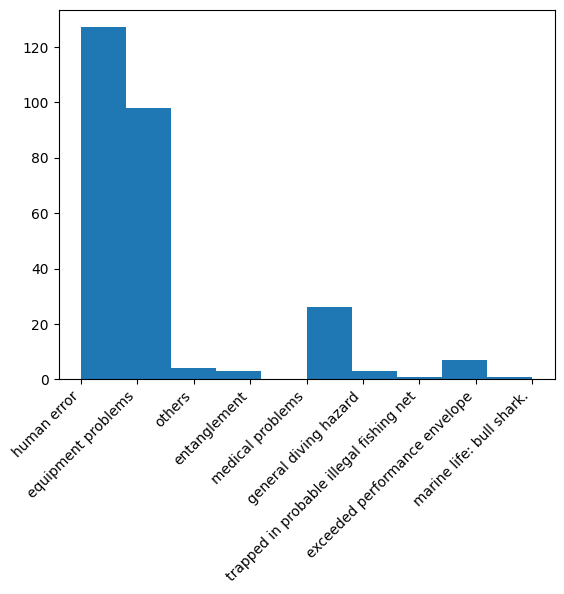

In [113]:
plt.hist(data4['Root Cause using fault tree method'], bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [114]:
data4 = data4.to_excel('../Data/cleaned/RB_Fatal_Accident_Database_100725.xlsx', index=False)
data4